In [1]:
import numpy as np
import os
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import re
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
with open('../data/Wireless_network.txt') as f:
    lines = f.readlines()
    f.close()

In [24]:
stop_words = set(stopwords.words('english'))

def split_data(lines):
    for i in range(len(lines)):
        if lines[i][0] == '\n':
            summary = lines[:i]
            lines = lines[i:]
            return summary, lines

def split_string(lines):
    sent_tokens = []
    for line in lines:
        line = re.sub("\n", "", line)
        line = re.sub("\\\\.", "", line)
        line = re.sub("===", "", line)
        for sent in sent_tokenize(line):
            sent_tokens.append(sent)
    return sent_tokens

def split_summary(lines):
    sent_tokens = ["_START_"]
    for line in lines:
        line = re.sub("\n", "", line)
        line = re.sub("\\\\.", "", line)
        line = re.sub("===", "", line)
        line = " ".join(["_START_", line, "_END_"])
        for sent in sent_tokenize(line):
            sent_tokens.append(sent)
    sent_tokens.append("_END_")
    return sent_tokens

def clean(string):
    word_tokens = word_tokenize(string)
    filtered_sentence = [w for w in word_tokens if (not w in stop_words) and (len(w)>3)]
    return filtered_sentence 

In [ ]:
summary, lines = split_data(lines)

In [ ]:
summary, lines = split_string(summary), split_string(lines)

[42, 9, 131, 70, 289, 22, 184, 46, 125, 174]
[3143, 1985, 5079, 926, 7196, 3034, 2030, 626, 4687, 2488]
(51,) 51


<ipython-input-25-1afa9d4dddce>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(text_overall).shape, len(summary_overall))


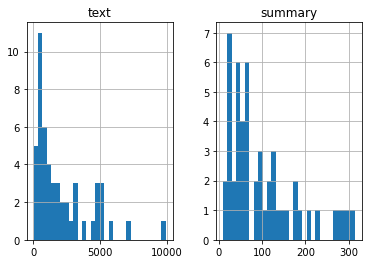

In [25]:
text_overall, summary_overall  = [], []
text_count, summary_count = [], []

directory = '../data'
for filename in os.listdir(directory):
    with open('../data/'+filename) as f:
        lines = f.readlines()
        f.close()

        summary, lines = split_data(lines)
        summary, lines = split_summary(summary), split_string(lines)

        clean_text = []
        tex_count = 0
        for line in lines:
            temp = clean(line)
            if temp != []:
                tex_count += (len(temp))
                for t in temp:
                    clean_text.append(t)  
        text_overall.append(clean_text)
        text_count.append(tex_count)

        clean_summary = []
        sum_count = 0
        for line in summary:
            temp = clean(line)
            if temp != []:
                sum_count+= (len(temp))
                for t in temp:
                    clean_summary.append(t)
        summary_overall.append(clean_summary)
        summary_count.append(sum_count)
        
print(summary_count[:10])
print(text_count[:10])
print(np.array(text_overall).shape, len(summary_overall))
overview = pd.DataFrame({'text':text_count, 'summary':summary_count})
overview.hist(bins=30)
plt.show()

In [31]:
max_text_len = 5000
max_summary_len = 200
x_train, x_test, y_train, y_test = train_test_split(text_overall, summary_overall, test_size=0.1, shuffle=True)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=max_text_len, padding='post', truncating='post')
x_test = pad_sequences(x_train, maxlen=max_text_len, padding='post', truncating='post')

print(x_train[:10])
x_voc_size = len(tokenizer.word_index)+1
print(x_voc_size)

y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(y_train)

y_train = y_tokenizer.texts_to_sequences(y_train)
y_test = y_tokenizer.texts_to_sequences(y_test)

y_train = pad_sequences(y_train, maxlen=max_summary_len, padding='post', truncating='post')
y_test = pad_sequences(y_train, maxlen=max_summary_len, padding='post', truncating='post')

print(y_train[:10])
y_voc_size = len(tokenizer.word_index)+1
print(y_voc_size)

[[  32  874 1322 ...    0    0    0]
 [ 115    2 1950 ...    0    0    0]
 [  30    7   45 ...    0    0    0]
 ...
 [ 167 2770   87 ...    0    0    0]
 [  26   26 1480 ...    0    0    0]
 [ 755  672   53 ...    0    0    0]]
14535
[[  1   1 252 ...   0   0   0]
 [  1   1   3 ...  60  68 456]
 [  1   1 467 ...   0   0   0]
 ...
 [  1   1   5 ...   0   0   0]
 [  1   1 512 ...   0   0   0]
 [  1   1 524 ...   0   0   0]]
14535
